In [ ]:
__version__ = "2.0"

# Scenario 3 - Break Even

In [ ]:
# objective_functions.py
from objective_functions import objective_function_e as obj_fun

# parameters.py
from parameters import get_parameters_e as get_parameters

# Standard Libraries
from time import perf_counter
from functools import partial

# General
import numpy as np
import pandas as pd
import optuna

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
plt.style.use("bmh")
plt.rcParams['figure.figsize'] = (16,10/2)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["rebeccapurple", "darkcyan", "deepskyblue", "olivedrab", "lawngreen", "darkkhaki", "darkgoldenrod", "saddlebrown", "firebrick", "deeppink"])

# Optimization

In [5]:
parameters, months = get_parameters()
results = []

start_time = perf_counter()

num_opt = 20
n_trials = 1000

for i in range(num_opt):
    
    study_name = f'Optimization-{i}-{n_trials}'
    
    start_opt_time  = perf_counter()
    
    study = optuna.create_study(study_name=study_name, direction='minimize')
    optuna.logging.set_verbosity(0)
    study.optimize(partial(obj_fun, parameters=parameters), n_trials=n_trials)
    
    print(f'{i} - {((perf_counter() - start_opt_time)/60):.3g} minutes')
    
    results.append(np.array([study.best_value, 
                             study.best_params['control_frequency'], 
                             study.best_params['initial_stock_level'], 
                             study.best_params['stock_floor'], 
                             study.best_params['stock_ceiling']]
                           ))
        
print(f'Total time: {((perf_counter() - start_time)/60):.3g} minutes')

0 - 12.1 minutes
1 - 12 minutes
2 - 11.9 minutes
3 - 11.6 minutes
4 - 6.91 minutes
5 - 12 minutes
6 - 6.94 minutes
7 - 10.5 minutes
8 - 10.7 minutes
9 - 10.5 minutes
10 - 10.5 minutes
11 - 10.2 minutes
12 - 10.3 minutes
13 - 10.6 minutes
14 - 10.2 minutes
15 - 10.3 minutes
16 - 10.7 minutes
17 - 7.22 minutes
18 - 10.7 minutes
19 - 10.5 minutes
Total time: 206 minutes


In [6]:
columns = ['Best Value','Control Frequency','Initial Stock Level','Stock Floor','Stock Ceiling']

try:
    df = pd.read_csv('scenario3',index_col=False)
except:
    df = pd.DataFrame(columns=columns)
    
results_df = pd.DataFrame(results, columns=columns)

df = pd.concat([df, results_df])
df.reset_index(drop=True, inplace=True)
df = df.sort_values('Best Value', ascending=True).reset_index(drop=True)
df.to_csv('optimizations/scenario3',index=False)
df

,Best Value,Control Frequency,Initial Stock Level,Stock Floor,Stock Ceiling
0,0.028630,22.0,2349.0,3.0,65.0
1,0.077266,17.0,2377.0,936.0,76.0
2,0.096792,29.0,2418.0,85.0,2077.0
3,0.271099,26.0,2693.0,4.0,5.0
4,0.290207,11.0,2710.0,470.0,2.0
5,0.420939,2.0,2258.0,2.0,202.0
6,0.428989,29.0,2473.0,267.0,146.0
7,0.497913,22.0,2433.0,2314.0,182.0
8,0.520272,22.0,1277.0,2173.0,364.0
9,0.619798,26.0,2480.0,2971.0,214.0


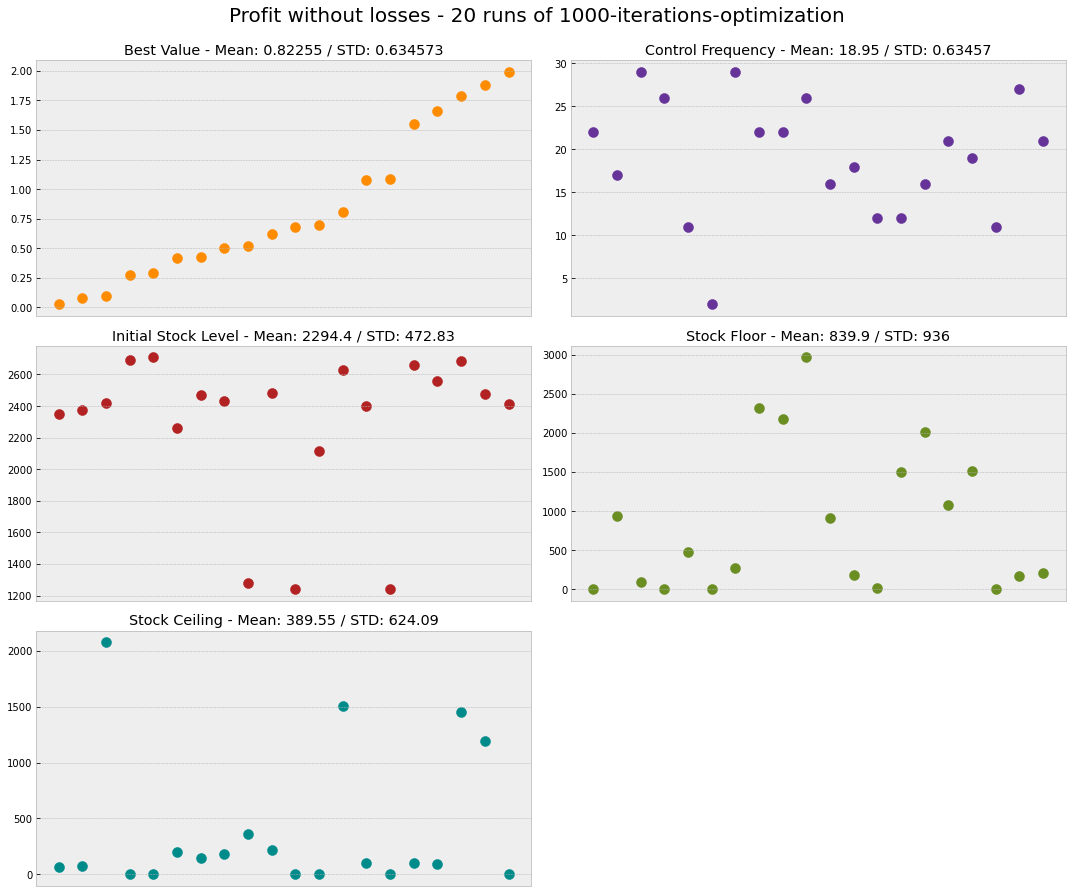

In [7]:
fig, axes = plt.subplots(3,2, figsize=(15,12), sharex=True)

axes[0,0].scatter(df.index, df['Best Value'], marker='o', s=100, color='darkorange')
axes[0,0].set_title(f"Best Value - Mean: {(df['Best Value'].mean()):.6g} / STD: {(df['Best Value'].std()):.6g}")

axes[0,1].scatter(df.index, df['Control Frequency'], marker='o', s=100, color='rebeccapurple')
axes[0,1].set_title(f"Control Frequency - Mean: {(df['Control Frequency'].mean()):.5g} / STD: {(df['Best Value'].std()):.5g}")

axes[1,0].scatter(df.index, df['Initial Stock Level'], marker='o', s=100, color='firebrick')
axes[1,0].set_title(f"Initial Stock Level - Mean: {(df['Initial Stock Level'].mean()):.5g} / STD: {(df['Initial Stock Level'].std()):.5g}")

axes[1,1].scatter(df.index, df['Stock Floor'], marker='o', s=100, color='olivedrab')
axes[1,1].set_title(f"Stock Floor - Mean: {(df['Stock Floor'].mean()):.5g} / STD: {(df['Stock Floor'].std()):.5g}")

axes[2,0].scatter(df.index, df['Stock Ceiling'], marker='o', s=100, color='darkcyan')
axes[2,0].set_title(f"Stock Ceiling - Mean: {(df['Stock Ceiling'].mean()):.5g} / STD: {(df['Stock Ceiling'].std()):.5g}")

fig.delaxes(axes[2,1])
plt.suptitle(f"Profit without losses - {num_opt} runs of {n_trials}-iterations-optimization",
             fontsize=20, y=1.03)
plt.xticks([])
plt.tight_layout()
plt.show()